In [107]:
import networkx as nx
from networkx.drawing.nx_agraph import write_dot, graphviz_layout
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; } </style>"))
from random import randint

In [224]:
class mynode:
    def __init__(self,parent,ID,value=None):
        self.ID=ID
        self.parent=parent
        self.value=value
        self.children=[]

    def append(self,ID,value=None):
        child=mynode(parent=self,ID=ID,value=value)
        self.children.append(child)
        return child
        
    def create_subgraph(self,graph,labels):
        if self.value is not None:
            labels[self.ID]=str(self.value)
        for child in self.children:
            graph.add_node(child.ID)
            graph.add_edge(self.ID,child.ID)
            if child.value is not None:
                labels[child.ID]=str(child.value)
            else:
                labels[child.ID]=''
            child.create_subgraph(graph,labels)
        

class mygraph:
    def __init__(self,centralnode=None):
        self.centralnode=centralnode
        self.labels={}
        
    def create_graph(self,graph):
        self.graph=graph
        self.centralnode.create_subgraph(self.graph,self.labels)
        #nx.draw(self.graph)

In [245]:
centralnode=mynode(None,1)
for i in range(3):
    next0=centralnode.append(10+i)
    for j in range(3):
        next1=next0.append(100+i*10+j)
        for k in range(3):
            next2=next1.append(next1.ID*10+k)
            for l in range(3):
                next3=next2.append(next2.ID*10+l,value=randint(0,99))

In [268]:
def minimax(node,depth,minormax):
    if depth==0:
        H.labels[node.ID]=(node.value,1)
        return node.value,node,
    else:
        values=[]
        ndepth=depth-1
        bestval=-1*minormax*1e18
        bestnode=None
        for child in node.children:
            nextval,_=minimax(child,ndepth,-1*minormax)
            if minormax>0:
                if nextval>bestval:
                    bestval=nextval
                    bestnode=child
            else:
                if nextval<bestval:
                    bestval=nextval
                    bestnode=child
        node.value=bestval
        H.labels[node.ID]=(node.value,minormax*100,100)
        return bestval,bestnode


In [ ]:
def alphabeta(node,depth,minormax,alpha,beta):
    if depth==0:
        H.labels[node.ID]=(node.value,1)
        return node.value,node,
    else:
        values=[]
        ndepth=depth-1
        bestval=-1*minormax*1e18
        bestnode=None
        for child in node.children:
            nextval,_=minimax(child,ndepth,-1*minormax)
            if minormax>0:
                if nextval>bestval:
                    bestval=nextval
                    bestnode=child
            else:
                if nextval<bestval:
                    bestval=nextval
                    bestnode=child
        node.value=bestval
        H.labels[node.ID]=(node.value,minormax*100,100)
        return bestval,bestnode



In [260]:
G=nx.DiGraph()
H=mygraph(centralnode)
H.create_graph(G)
mm=1

        


In [269]:
minimax(centralnode,4,1)

(48, <__main__.mynode at 0x7f3778e78160>)

<IPython.core.display.Javascript object>


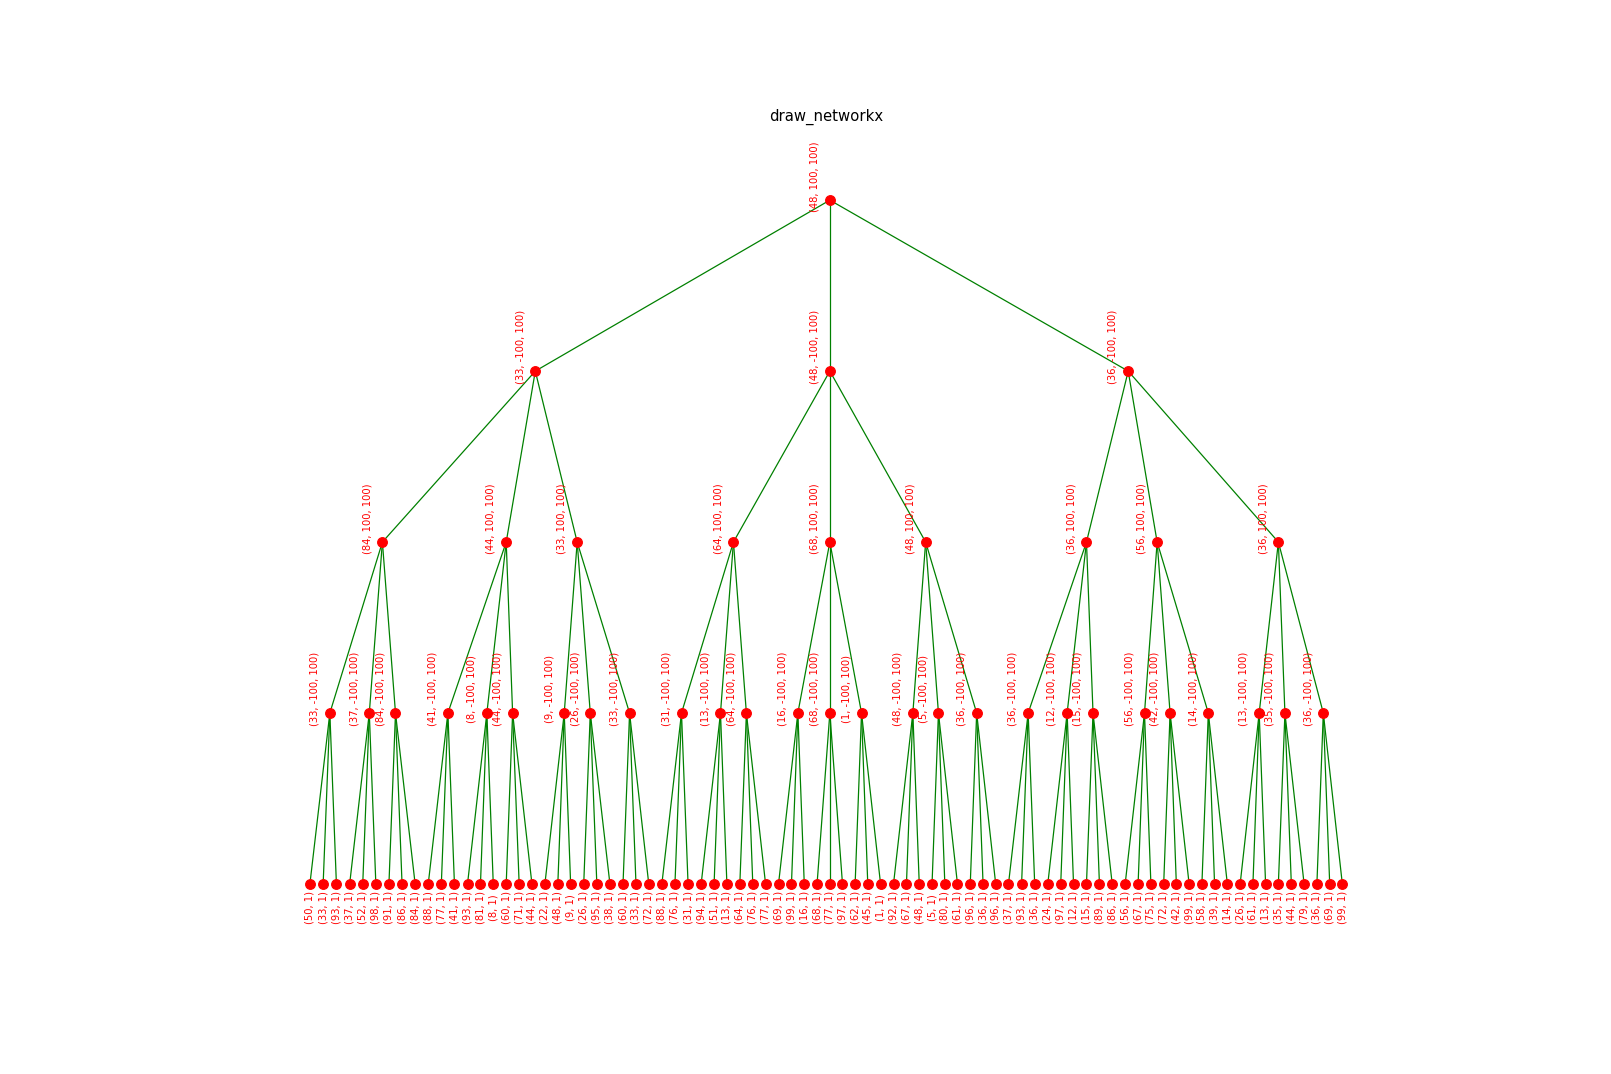

In [270]:
%matplotlib notebook
plt.figure(3,figsize=(18,12)) 


plt.title('draw_networkx')
pos =graphviz_layout(G, prog='dot')
labels={}
post=pos.copy()
for node in G.nodes:
    if node >= 10000:
        post[node]=(post[node][0],post[node][1]-10)
    else:
        post[node]=(post[node][0]-100,post[node][1]+10)
#write_dot(G,'test.dot')
#G.draw()
nx.draw(G, pos, with_labels=False, arrows=False,node_size=60,font_size=8,edge_color='g')
text=nx.draw_networkx_labels(G,post,H.labels,font_size=8,font_color='r')
for _,t in text.items():
    t.set_rotation('vertical')

In [147]:
next2.children[0].value

8

<IPython.core.display.Javascript object>


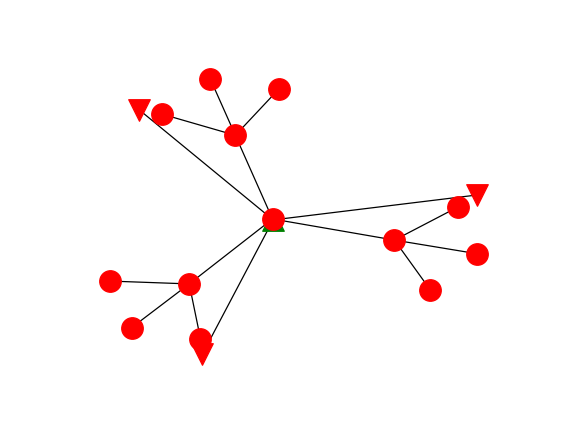

In [25]:
%matplotlib notebook
b=3
G = nx.Graph()
G.add_node(1)
for i in range(b):
    G.add_node(10+i) # You can also add a list of nodes by passing a list argument
    G.add_edge(1,10+i)

# Add edges 

#e = (2,3)
#G.add_edge(*e) # * unpacks the tuple
#G.add_edges_from([(1,11), (1,12),(1,13)]) # Just like nodes we can add edges from a list
pos=nx.spring_layout(G)
#pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=[1],node_shape='^',node_color='g')
nx.draw_networkx_nodes(G,pos,nodelist=[10,11,12],node_shape='v')
nx.draw_networkx_edges(G,pos)

In [19]:
H=G.subgraph((1,2))

<IPython.core.display.Javascript object>


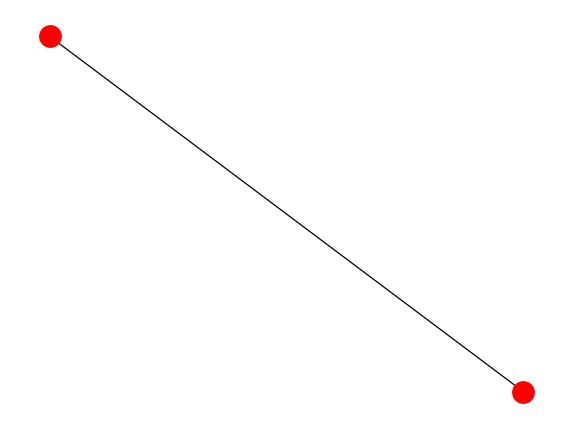

In [20]:
%matplotlib notebook
nx.draw(H)